In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\vaclavmalecek\Desktop\data_science\opsd_germany_daily.csv")

In [3]:
df.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
x = "2006-01-01"
x[-4]

'1'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [6]:
df.size

21915

In [7]:
df.shape

(4383, 5)

In [8]:
df.isna().sum().sum()

5854

In [9]:
df["Year"] = df.Date.apply(lambda x: x[0:4]).astype(int)

In [10]:
per_year = df.groupby(["Year"],as_index=False)[["Consumption","Wind","Solar","Wind+Solar"]].apply(sum)

In [11]:
per_year["Wind+Solar"] = per_year.Solar + per_year.Wind

In [12]:
per_year["Other_sources"] = per_year.Consumption - per_year["Wind+Solar"]

In [13]:
per_year

,Year,Consumption,Wind,Solar,Wind+Solar,Other_sources
0,2006,489068.53600,0.000,0.000,0.000,489068.53600
1,2007,496631.84700,0.000,0.000,0.000,496631.84700
2,2008,495570.87600,0.000,0.000,0.000,495570.87600
3,2009,459737.42800,0.000,0.000,0.000,459737.42800
4,2010,488588.70000,35911.777,0.000,35911.777,452676.92300
5,2011,484814.08600,44032.951,0.000,44032.951,440781.13500
6,2012,469574.75400,45862.667,27887.332,73749.999,395824.75500
7,2013,463336.85300,47197.832,29559.780,76757.612,386579.24100
8,2014,504164.82100,51107.672,32498.307,83605.979,420558.84200
9,2015,505264.56300,77468.994,34907.138,112376.132,392888.43100


<AxesSubplot:title={'center':'Sources of electricity in Germany (2006-2017)'}, xlabel='Years', ylabel='GWh'>

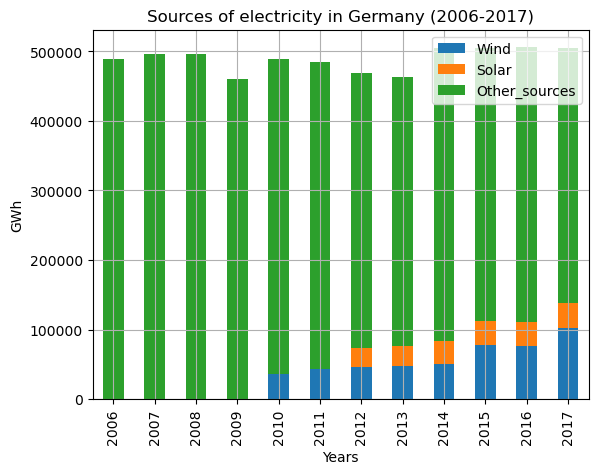

In [14]:
per_year_1 = per_year.drop(["Consumption","Wind+Solar"],axis=1)
per_year_1.plot(x="Year", kind="bar", stacked=True,
        title="Sources of electricity in Germany (2006-2017)",
               xlabel="Years",
               ylabel="GWh",
               grid=True)

In [15]:
df["Month"] = df.Date.apply(lambda x: x[5:7]).astype(int)

In [16]:
per_month = df.groupby(["Month"],as_index=False)["Consumption"].sum()

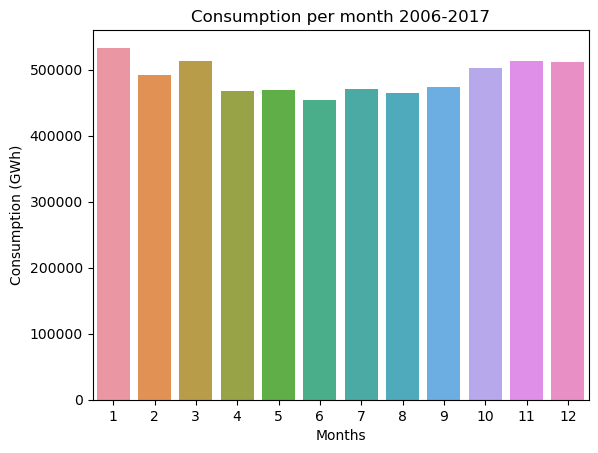

In [17]:
sns.barplot(x=per_month.Month,y=per_month.Consumption)
plt.title("Consumption per month 2006-2017")
plt.ylabel("Consumption (GWh)")
plt.xlabel("Months")
plt.show()